# MOVIES MOVIES MOVIES !!!

## Step 1: Data Collection

In [47]:
import requests
import tarfile
import numpy as np
import pandas as pd
import _sqlite3 as sql
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [7]:
# downloading the data. These are datasets provided for non-commercial use
url= 'https://datasets.imdbws.com/title.basics.tsv.gz';
url2= 'https://datasets.imdbws.com/title.ratings.tsv.gz';

titledata= requests.get(url);
ratingdata= requests.get(url2);

title_filename= 'title_data.tsv.gz';
ratings_filename= 'ratings.tsv.gz';

# write the files to our directory
open(title_filename, 'wb').write(titledata.content);
open(ratings_filename, 'wb').write(ratingdata.content);

In [8]:
# reading the data into panda dataframes
title_df= pd.read_csv(title_filename, sep="\t", compression="gzip", dtype={'isAdult': str});
ratings_df= pd.read_csv(ratings_filename, sep="\t", compression="gzip");
print(title_df.head(5), ratings_df.head(5))

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short         tconst  averageRating  numVotes
0  tt0000001            5.7      1971
1  tt0000002            5.8       263
2  tt0000003   

In [12]:
box_office_url = 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/'
box_req = requests.get(box_office_url)
soup = BeautifulSoup(box_req.content, 'html5lib')
box_df= pd.read_html(io=str(soup.find('table')))[0]
box_df.head(3)

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year
0,1,Avatar,"$2,923,706,026","$785,221,649",26.9%,"$2,138,484,377",73.1%,2009
1,2,Avengers: Endgame,"$2,799,439,100","$858,373,000",30.7%,"$1,941,066,100",69.3%,2019
2,3,Avatar: The Way of Water,"$2,319,768,328","$684,018,775",29.5%,"$1,635,749,553",70.5%,2022


## Step 2: Data Processing

Merge our two datasets into the same datafram

In [13]:
# when u remove and clean values
df = pd.merge(left=title_df, right=ratings_df, on='tconst', how='inner')

In [14]:
df.drop(labels=['endYear'],axis=1, inplace=True)

In [15]:
df.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,1,"Documentary,Short",5.7,1971
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,5,"Animation,Short",5.8,263
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance",6.5,1817
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,12,"Animation,Short",5.6,178
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,1,"Comedy,Short",6.2,2613


Keep only the titles named movies

We need to parse certain columns to integers

In [16]:
df.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult            object
startYear          object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
dtype: object

Here we are only looking at movies so we can drop all other forms of media (short films, shows, ...). We are analyzing these movies over time thus, we can drop any movies without a release date ('startYear'). Then, we need to convert the release dates from strings to integers so we can plot them.

In [18]:
# keep only movies
df = df[df['titleType'] == 'movie']
# drop movies without a release date
df = df[df['startYear'] != '\\N']
# convert release date from strings to integers
df['startYear'] = df['startYear'].apply(int)

Something about bias here...

In [19]:
# 1 if isAdult else, if it's any other value (0 or invalid)
# TODO comment on how this will introduce bias
function = lambda x: True if x == '1' else False
df['isAdult'] = df['isAdult'].apply(function)

In [20]:
df.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,False,1894,45,Romance,5.3,204
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,False,1897,100,"Documentary,News,Sport",5.3,469
326,tt0000502,movie,Bohemios,Bohemios,False,1905,100,\N,4.1,15
358,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,False,1906,70,"Action,Adventure,Biography",6.0,826
366,tt0000591,movie,The Prodigal Son,L'enfant prodigue,False,1907,90,Drama,4.4,20


## Step 3: Exploratory Analysis and Data Vizualization

In [21]:
# make nice graphs and get some info about the data
# budget vs ratings
# box office vs ratings

In [23]:
#df.sort_values(by=['numVotes'], ascending=False).head(10)

<b>Are films getting better or worse as time goes by?</b>

Average each year's rating, and graph

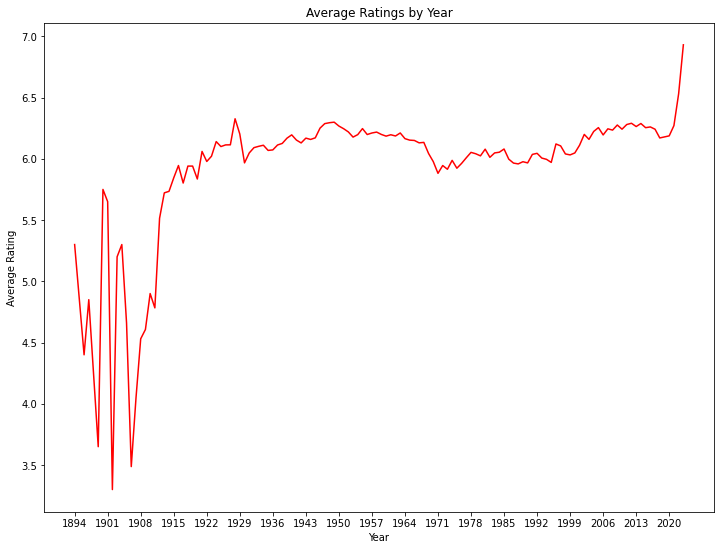

In [117]:
# convert the ratings to floats to make analysis easier
df_avg_rating= df.groupby(by= 'startYear')['averageRating'].mean();
df_avg_rating.plot.line(x= 'startingYear', y= 'averageRating', figsize= (12, 9), xlabel= 'Year', ylabel= 'Average Rating', \
                        color= 'red', title= 'Average Ratings by Year', xticks= range(1894, 2023, 7));

We can see a trend that after the early years with very few films, the average rating stabilizes. Interestingly, between the mid-60s and early 2000s, there is a dip in the average rating of films. What is odd is the sudden spike in recent years. This could be explained by how few films came out during the pandemic, so critics were happy to have anything. It will be interesting to see where this trend goes over time now that the pandemic is mostly over.

However, this is a bit muddied, since many movies have few ratings. If we only take movies with >50 ratings (the Rotten Tomatoes criteria for rating listing and ranking), then we get different results.

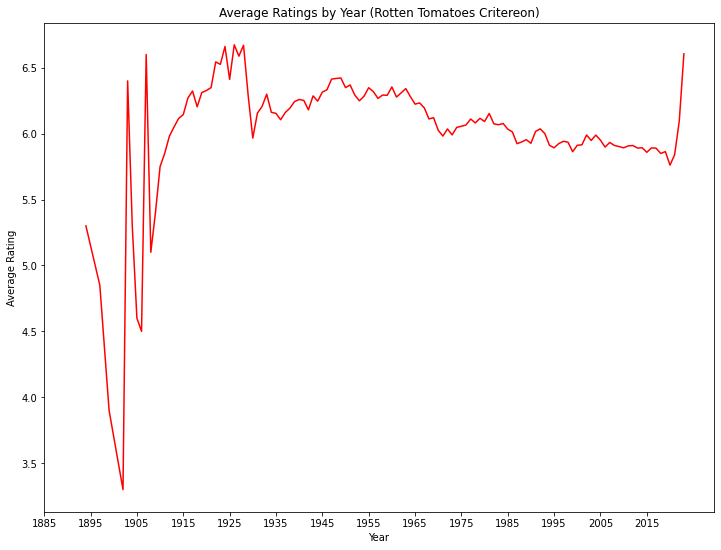

In [121]:
# convert the ratings to floats to make analysis easier
df_avg_rating2= df[df['numVotes'] >= 50]
df_avg_rating2= df_avg_rating2.groupby(by= 'startYear')['averageRating'].mean();

df_avg_rating2.plot.line(x= 'startingYear', y= 'averageRating', figsize= (12, 9), xlabel= 'Year', ylabel= 'Average Rating', \
                        color= 'red', title= 'Average Ratings by Year (Rotten Tomatoes Critereon)', xticks= range(1885, 2023, 10));

By cutting films with fewer than 50 ratings, we can see that ratings after roughly 1929 appear to go down in quality. As some inital hypotheses, the Great Depression could have led to more, but lower quality films being produced, lowering the average. We cannot yet extrapolate that films are getting worse, because it could be that simply more films are being made. In this way the trend towards lower ratings could represent a democratization of filmmaking, at the cost of some SharkNados getting through.

<b>Do critics have an appetite for mature themes?</b>

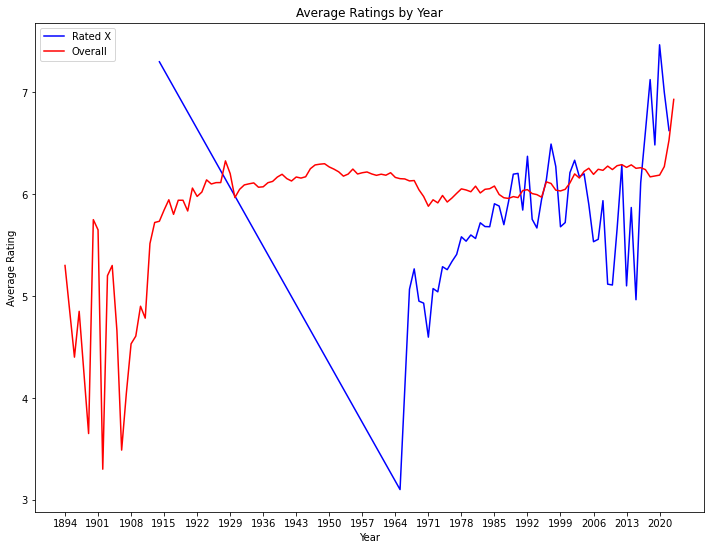

In [163]:
df_avg_rating= df.groupby(by= 'startYear')['averageRating'].mean();
df_rated_x= df[df['isAdult'] == True].groupby(by= 'startYear')['averageRating'].mean();
df_rated_x.plot.line(x= 'startingYear', y= 'averageRating', figsize= (12, 9), xlabel= 'Year', ylabel= 'Average Rating', \
                        color= 'blue', label= 'Rated X', title= 'Average Ratings by Year', xticks= range(1894, 2023, 7));
df_avg_rating.plot.line(x= 'startingYear', y= 'averageRating', figsize= (12, 9), xlabel= 'Year', ylabel= 'Average Rating', \
                        color= 'red', label= 'Overall', title= 'Average Ratings by Year', xticks= range(1894, 2023, 7));
plt.legend();

This plot tells a story about censorship in the US. The gap between 1914 and 1964 represents the years where Hays Code were active, and thus Rated X movies and their themes were not allowed. Interestingly, Hays code came into effect 1934, so it may also be in part due to incomplete iMDB data. Incomplete data also tells a story about how over 90% of silent films and over 70% of films from both the silent to early talkie era have been lost.

As the 60s and 70s went on, X rated films reviewed better coinciding with the sexual liberation movement or sexual revolution. Additionally, crime movies with extreme violence gained prominence, spurred on by the commercially successful and critically acclaimed film, The Godfather (1972).

## Analysis, Hypothesis Testing, and Machine Learning

In [ ]:
# more in depth, test hypotheses coming from the graphs

## Insight and Policy Decision

## Conclusion